I want to generate layout in poster design format. please recover the layout html according to the bbox , categories, size, image I provide (in html format):
###bbox html: <body> <svg width="513" height="750"> <rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>
<rect data-category="Underlay", x="<MASK>", y="190", width="<MASK>", height="<MASK>"/>
<rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>
<rect data-category="Logo", x="<MASK>", y="<MASK>", width="115", height="<MASK>"/> </svg> </body> <MID>
--------------------------------------
<body> <svg width="513" height="750"> <rect data-category="Logo", x="18", y="22", width="116", height="38"/>
<rect data-category="Text", x="100", y="196", width="316", height="45"/>
<rect data-category="Underlay", x="79", y="188", width="357", height="61"/>
<rect data-category="Text", x="95", y="103", width="325", height="70"/> </svg> </body>


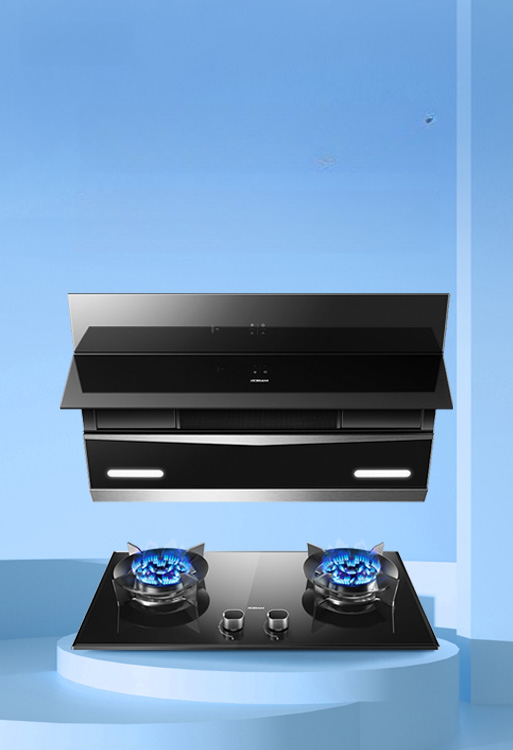

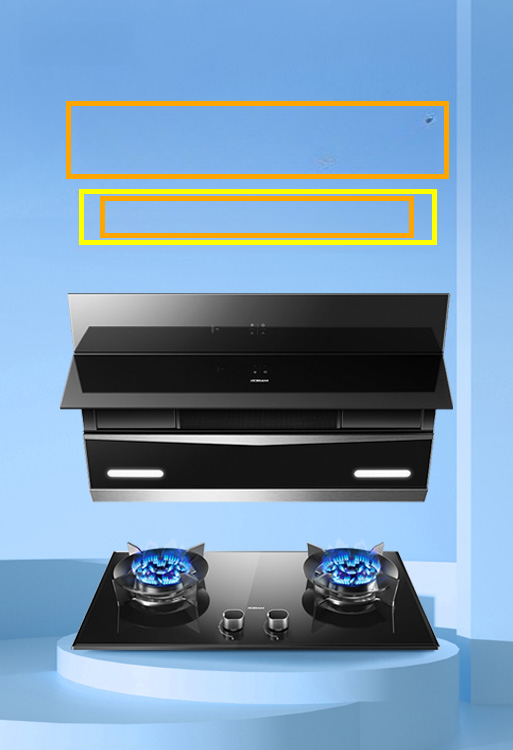

In [1]:
import json
from PIL import Image
import os
with open("/data1/poong/PosterNUWA/data/cgl_dataset/for_posternuwa/html_format_img_instruct_all_mask_and_all_condition/test_numerical.jsonl", "r") as f:
    sample = [json.loads(line) for line in f]
with open("/data1/poong/PosterNUWA/log_dir/train_stage2_with_augment_dino_codellama_text/generated_sample/16_f/test_numerical.jsonl", "r") as f:
    content = [json.loads(line) for line in f]
index = 120
print(sample[index]['cond_recover_mask_input_seqs'][1])
print("--------------------------------------")
print(content[index]['cond_recover_mask'])
display(Image.open(content[index]['image']))
display(Image.open(os.path.join("log_dir/train_stage2_with_augment_dino_codellama_text/generated_sample/16_f/samples",content[index]['image'].split("/")[-1])))

In [55]:
print(sample[0].keys())
print("--------------------------")
print(sample[0]['unconditional_input_seqs'][0])

dict_keys(['cond_bbox_input_seqs', 'continual_gen_input_seqs', 'cond_cate_size_to_pos_input_seqs', 'cond_cate_pos_to_size_input_seqs', 'cond_cate_to_size_pos_input_seqs', 'unconditional_input_seqs', 'cond_recover_mask_input_seqs', 'completion_input_seqs', 'refinement_input_seqs', 'labels', 'name', 'raw_data', 'id_'])
--------------------------
I want to generate layout in poster design format. plaese generate the layout html according to the image I provide (in html format):
###bbox html: <body> <svg width="513" height="750">  </svg> </body> <MID>


In [1]:
from src.model.minigpt4 import MiniGPT4
from src.processor.blip_processors import Blip2ImageTrainProcessor,Blip2ImageEvalProcessor,DinoImageProcessor
import torch
import json
import os
from PIL import Image
#O1CN01dIJZBW1NzceChusMt_!!2209850871641-0-alimamazszw
with open("/data1/poong/PosterNUWA/log_dir/train_stage2_with_augment_dino_codellama/generated_sample/16_f/test_numerical.jsonl", "r") as f:
    content = [json.loads(line) for line in f]
#with open("/data1/poong/PosterNUWA/data/cgl_dataset/for_posternuwa/html_format_img_instruct_all_mask_and_all_condition/test_numerical.jsonl", "r") as f:
#    sample = [json.loads(line) for line in f]
with open("/data1/poong/PosterNUWA/data/cgl_dataset/for_posternuwa/html_format_img_instruct_mask_all_condition/test_numerical.jsonl", "r") as f:
    sample = [json.loads(line) for line in f]    
device = f"cuda:{4}" if torch.cuda.is_available() else "cpu"
vit_model_name = "dino_v2"
llama_model = "models/codeLlama-7b-hf"
base_model = "/data1/poong/tjfwownd/PosterNUWA/log_dir/train_stage2_with_augment_dino_codellama_text/checkpoints/checkpoint-16/pytorch_model.bin"
model = MiniGPT4(lora_r=64,low_resource=False,vit_model = vit_model_name,llama_model = llama_model)
model.load_state_dict(torch.load(base_model,map_location="cpu"))
model = model.to(device)
model.device = device
model.half()
model.eval()

image_processor = DinoImageProcessor()

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'CodeLlamaTokenizer'. 
The class this function is called from is 'LlamaTokenizer'.
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

/opt/anaconda/poong/anaconda3/envs/PosterLlama/lib/python3.9/site-packages/peft/utils/other.py:136: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(


trainable params: 33,554,432 || all params: 6,772,101,120 || trainable%: 0.49548037463445316
Do not use Q-Former here.
Vit_model dino_v2
Load 1 training prompts
Prompt Example 
['[INST] <Img><ImageHere></Img> [/INST] ']


1630
I want to generate layout in poster design format. please complete the layout html according to the image and element I provide (in html format):
###bbox html: <body> <svg width="513" height="750"> <rect data-category="Text", x="201", y="408", width="114", height="16"/>
<rect data-category="Text", x="28", y="342", width="457", height="46"/>
<rect data-category="Underlay", x="168", y="403", width="178", height="25"/> </svg> </body> 


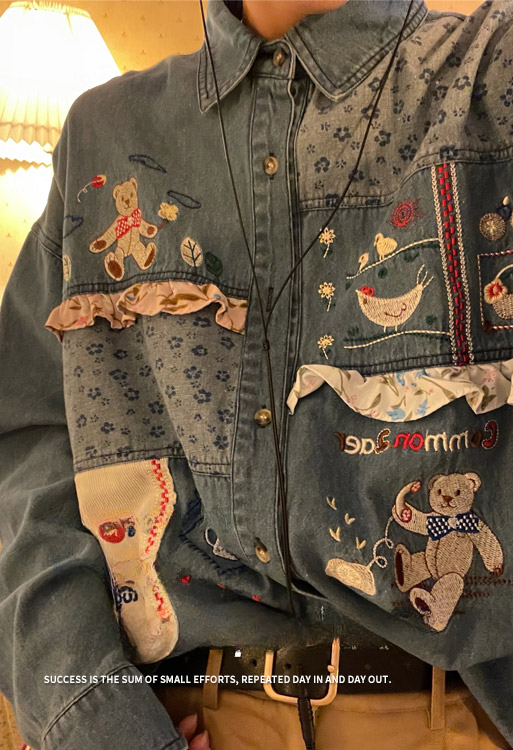

In [5]:
from PIL import Image
import torch
from generation import *
from html_to_ui import get_bbox
import os
from src.processor.blip_processors import Blip2ImageTrainProcessor,Blip2ImageEvalProcessor,DinoImageProcessor
image_processor = DinoImageProcessor()
def split_string_by_delimiter(input_string, delimiter):
    # 입력 문자열을 특정 문자(delimiter)를 기준으로 분할하여 전후 문자열을 반환합니다.
    parts = input_string.split(delimiter)

    # 분할된 문자열이 두 개 이상인 경우, 전후 문자열을 반환합니다.
    if len(parts) >= 2:
        before_delimiter = parts[0]
        after_delimiter = delimiter.join(parts[1:])
        return before_delimiter, after_delimiter
    else:
        # 특정 문자(delimiter)를 찾을 수 없는 경우, 원래 문자열과 빈 문자열을 반환합니다.
        return input_string, ""
#image = Image.new("RGB", (513, 750), "white")
#index-=1
#index +=1 #1573 conditional generation refinement,completion
#Conditional generation Sup : 1589,1615,1630,1687
#index = 1600
#index -=1
index = 1687
image = content[index]['image']
#image = os.path.join("/data1/poong/tjfwownd/PosterNUWA/data/cgl_dataset/test_sample/image_sample/output","O1CN01RESq4Y1joYdOjjdIX_!!3914074595-0-alimamazszw.png")
image = Image.open(image)
im = image_processor(image)
im = im.unsqueeze(0)
index = 1630
text = sample[index]['completion_input_seqs'][1] # refinement_input_seqs    completion_input_seqs
inst = split_string_by_delimiter(text,"<MID>")[0]
print(index)
print(inst)
image


In [11]:
print(sample[0].keys())
print(inst)
inst = 'I want to generate layout in poster design format. please complete the layout html according to the image and element I provide (in html format):\n###bbox html: <body> <svg width="513" height="750"> <rect data-category="Logo", x="35", y="24", width="165", height="26"/>\n<rect data-category="Underlay", x="154", y="224", width="207", height="28"/>\n<rect data-category="Text", x="167", y="89", width="180", height="45"/> </svg> </body> '


dict_keys(['cond_bbox_input_seqs', 'continual_gen_input_seqs', 'cond_cate_size_to_pos_input_seqs', 'cond_cate_pos_to_size_input_seqs', 'cond_cate_to_size_pos_input_seqs', 'unconditional_input_seqs', 'cond_recover_mask_input_seqs', 'completion_input_seqs', 'refinement_input_seqs', 'labels', 'name', 'raw_data', 'id_'])
I want to generate layout in poster design format. plaese generate the layout html according to the image I provide (in html format):
###bbox html: <body> <svg width="513" height="750">  </svg> </body> 


In [456]:
uncond_inst = 'I want to generate layout in poster design format. plaese generate the layout html according to the image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750">  </svg> </body> '
gen_it_inst1= 'I want to generate layout in poster design format. please generate the layout html according to the categories and image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750"> <rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>\n<rect data-category="Embellishment", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>\n<rect data-category="Embellishment", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/> </svg> </body> '
gen_its_inst1= 'I want to generate layout in poster design format. please generate the layout html according to the categories and size and image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750"> <rect data-category="Text", x="<MASK>", y="<MASK>", width="125", height="25"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="131", height="29"/>\n<rect data-category="Logo", x="<MASK>", y="<MASK>", width="290", height="53"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="431", height="92"/>\n<rect data-category="Underlay", x="<MASK>", y="<MASK>", width="156", height="42"/> </svg> </body> '
gen_itp_inst1 = 'I want to generate layout in poster design format. please generate the layout html according to the categories and position and image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750"> <rect data-category="Underlay", x="35", y="149", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="131", y="210", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="99", y="60", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="56", y="154", width="<MASK>", height="<MASK>"/>\n<rect data-category="Underlay", x="309", y="150", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="332", y="156", width="<MASK>", height="<MASK>"/> </svg> </body> '
gen_recover_inst1= 'I want to generate layout in poster design format. please recover the layout html according to the bbox , categories, size, image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750"> <rect data-category="Logo", x="50", y="<MASK>", width="<MASK>", height="34"/>\n<rect data-category="Underlay", x="139", y="<MASK>", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="50"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/> </svg> </body> '

gen_it_inst2= 'I want to generate layout in poster design format. please generate the layout html according to the categories and image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750"> <rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/> </svg> </body> '
gen_its_inst2= 'I want to generate layout in poster design format. please generate the layout html according to the categories and size and image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750"> <rect data-category="Text", x="<MASK>", y="<MASK>", width="208", height="58"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="331", height="60"/> </svg> </body> '
gen_itp_inst2 = 'I want to generate layout in poster design format. please generate the layout html according to the categories and position and image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750"> <rect data-category="Text", x="50", y="508", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="51", y="548", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="45", y="607", width="<MASK>", height="<MASK>"/> </svg> </body> '
gen_recover_inst2= 'I want to generate layout in poster design format. please recover the layout html according to the bbox , categories, size, image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750"> <rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="<MASK>"/>\n<rect data-category="Logo", x="<MASK>", y="35", width="<MASK>", height="<MASK>"/>\n<rect data-category="Text", x="<MASK>", y="<MASK>", width="<MASK>", height="59"/>\n<rect data-category="Underlay", x="<MASK>", y="0", width="<MASK>", height="<MASK>"/> </svg> </body> '



In [457]:
print(uncond_inst)

I want to generate layout in poster design format. plaese generate the layout html according to the image I provide (in html format):
###bbox html: <body> <svg width="513" height="750">  </svg> </body> 


In [44]:
# 아주 중요함 내가 만든 augmentation들의 인덱스.!! 위치는 여기 :/data1/poong/PosterNUWA/data/cgl_dataset/test_sample/image_sample/output
te = ["O1CN01AnvjgL2COZ04hOAqp_!!2210144838464-0-alimamazszw.jpg","O1CN01eveTZ42CTbMA4WBGI_!!2207992838475-0-alimamazszw.jpg","O1CN01gWYWyg1JyvZL3X4M8_!!2298471098-0-alimamazszw.jpg"
      ,"O1CN01RESq4Y1joYdOjjdIX_!!3914074595-0-alimamazszw.jpg","O1CN01wevU641mFhISuCmJN_!!734434925-0-alimamazszw.jpg","O1CN01YwgXqi2CI9T9dy9Ad_!!3158998450-0-alimamazszw.jpg",
      "O1CN01yYmZnQ1uuTWJ02Zxw_!!4260076097-0-alimamazszw.jpg","O1CN01ZniFff25pOuni6wmB_!!2453037575-0-alimamazszw.jpg","O1CN010nMNmT2DPJFi1bsnn_!!2355718601-0-alimamazszw.jpg"]
te = ["O1CN01DSO6GT1Wt3WEfHIbz_!!2205003042845-0-alimamazszw.jpg"]
for i,sam in enumerate(sample):
    imn = sam['name'][0][0]
    if imn in te:
        print(i, imn)

2575 O1CN01DSO6GT1Wt3WEfHIbz_!!2205003042845-0-alimamazszw.jpg


In [427]:
with torch.no_grad():
    with torch.autocast(device_type="cuda"):
        samp = model.generate(im, [inst],max_new_tokens=400,do_sample=True,temperature=0.6,top_p=0.9)

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


### GT layout 보여주기

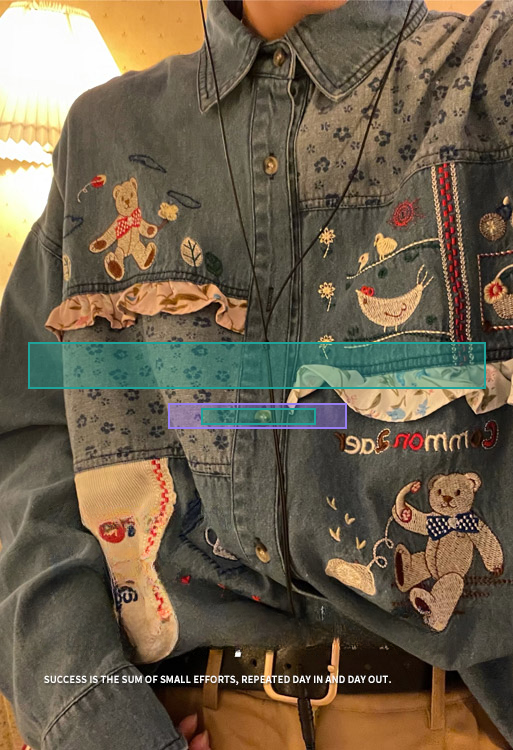

In [6]:
def sort_key(x):
    # 클래스가 3이면, 정렬 우선순위를 가장 높게 설정
    if x[0] == 3:
        return -1
    else:
        return x[0]

DATASET_COLOR = {
    1: '#929F29', #"#FF0000",       # 빨 , logo 
    2: '#1FA39A', #"#FFA500",       # 주 , text
    3: '#987FF2', #"#FFFF00",       # 노 , underlay
    4: '#F56881', #"#008000"        # 초 , emblishment
    5: "#0000FF"        # 파
}
bboxes,clses = get_bbox(inst)#get_bbox(samp[0])
drawbbox = []
for bbox in bboxes:
    x1, y1, x2, y2 = bbox
    x2 += x1
    y2 += y1
    bbox  = [x1, y1, x2, y2]
    drawbbox.append(np.array(bbox))

#image = Image.new("RGB", (513, 750), "white")
    
drawn_outline = image.copy()
drawn_fill = image.copy()
draw_ol = ImageDraw.ImageDraw(drawn_outline)
draw_f = ImageDraw.ImageDraw(drawn_fill)


sorted_pairs = sorted(zip(clses, drawbbox), key=sort_key)
sorted_classes, sorted_bboxes = zip(*sorted_pairs)

# 결과를 리스트로 변환
clses = list(sorted_classes)
drawbbox = list(sorted_bboxes)

for b,l in zip(drawbbox,clses):
    draw_ol.rectangle([b[0],b[1],b[2],b[3]], outline=DATASET_COLOR[l], width=2)
for b,l in zip(drawbbox,clses):
    draw_f.rectangle([b[0],b[1],b[2],b[3]], fill=DATASET_COLOR[l])

#b= drawbbox[0]
#l = clses[0]
#draw_ol.rectangle([b[0],b[1],b[2],b[3]], outline=DATASET_COLOR[l], width=2)
#draw_f.rectangle([b[0],b[1],b[2],b[3]], fill=DATASET_COLOR[l])
    
drawn_outline = drawn_outline.convert("RGBA")
drawn_fill = drawn_fill.convert("RGBA")

drawn_fill.putalpha(int(256 * 0.4))
img = Image.alpha_composite(drawn_outline, drawn_fill)
#draw_bbox(image,bbox,label)
img


### Generate Layout Visualiation

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


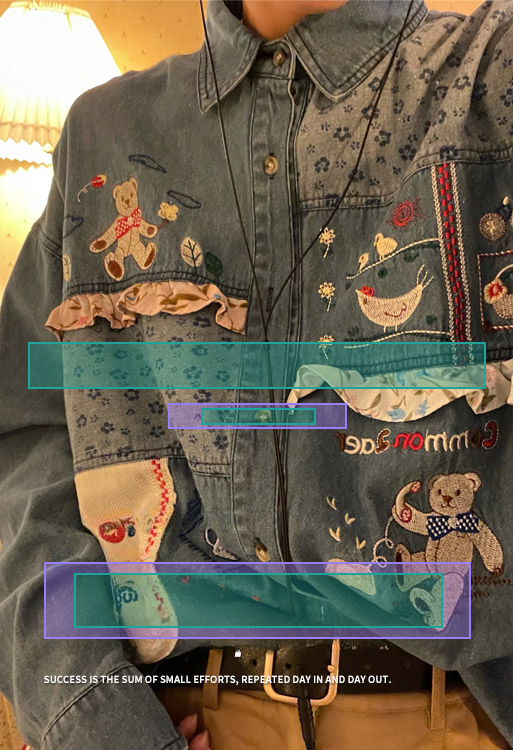

In [18]:
with torch.no_grad():
    with torch.autocast(device_type="cuda"):
        samp = model.generate(im, [inst],max_new_tokens=400,do_sample=True,temperature=0.6,top_p=0.9)
def sort_key(x):
    # 클래스가 3이면, 정렬 우선순위를 가장 높게 설정
    if x[0] == 3:
        return -1
    else:
        return x[0]

DATASET_COLOR = {
    1: '#929F29', #"#FF0000",       # 빨 , logo 
    2: '#1FA39A', #"#FFA500",       # 주 , text
    3: '#987FF2', #"#FFFF00",       # 노 , underlay
    4: '#F56881', #"#008000"        # 초 , emblishment
    5: "#0000FF"        # 파
}
bboxes,clses = get_bbox(samp[0])
drawbbox = []
for bbox in bboxes:
    x1, y1, x2, y2 = bbox
    x2 += x1
    y2 += y1
    bbox  = [x1, y1, x2, y2]
    drawbbox.append(np.array(bbox))
drawn_outline = image.copy()
drawn_fill = image.copy()
draw_ol = ImageDraw.ImageDraw(drawn_outline)
draw_f = ImageDraw.ImageDraw(drawn_fill)


sorted_pairs = sorted(zip(clses, drawbbox), key=sort_key)
sorted_classes, sorted_bboxes = zip(*sorted_pairs)

# 결과를 리스트로 변환
clses = list(sorted_classes)
drawbbox = list(sorted_bboxes)

for b,l in zip(drawbbox,clses):
    draw_ol.rectangle([b[0],b[1],b[2],b[3]], outline=DATASET_COLOR[l], width=2)
for b,l in zip(drawbbox,clses):
    draw_f.rectangle([b[0],b[1],b[2],b[3]], fill=DATASET_COLOR[l])

#b= drawbbox[0]
#l = clses[0]
#draw_ol.rectangle([b[0],b[1],b[2],b[3]], outline=DATASET_COLOR[l], width=2)
#draw_f.rectangle([b[0],b[1],b[2],b[3]], fill=DATASET_COLOR[l])
    
drawn_outline = drawn_outline.convert("RGBA")
drawn_fill = drawn_fill.convert("RGBA")

drawn_fill.putalpha(int(256 * 0.4))
img = Image.alpha_composite(drawn_outline, drawn_fill)
#draw_bbox(image,bbox,label)
img


# Testing

In [2]:
from src.model.minigpt4 import MiniGPT4
from src.processor.blip_processors import Blip2ImageTrainProcessor,Blip2ImageEvalProcessor,DinoImageProcessor
import torch
import json
import os
from PIL import Image
from html_to_ui import get_bbox
from generation import *
#with open("log_dir/train_stage2_with_augment_dino_codellama/generated_sample/16/test_numerical.jsonl", "r") as f:
#    content = [json.loads(line) for line in f]
#with open("data/cgl_dataset/for_posternuwa/html_format_img_instruct_all_mask_and_all_condition/test_numerical.jsonl", "r") as f:
#    sample = [json.loads(line) for line in f]
device = f"cuda:{7}" if torch.cuda.is_available() else "cpu"
vit_model_name = "dino_v2"
llama_model = "models/codeLlama-7b-hf"
base_model = "log_dir/train_stage2_with_augment_dino_codellama_text/checkpoints/checkpoint-16/pytorch_model.bin"
model = MiniGPT4(lora_r=64,low_resource=False,vit_model = vit_model_name,llama_model = llama_model)
model.load_state_dict(torch.load(base_model,map_location="cpu"))
model = model.to(device)
model.device = device
model.half()
model.eval()

image_processor = DinoImageProcessor()


The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'CodeLlamaTokenizer'. 
The class this function is called from is 'LlamaTokenizer'.
You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


Loading checkpoint shards:   0%|          | 0/6 [00:00<?, ?it/s]

/opt/anaconda/poong/anaconda3/envs/PosterLlama/lib/python3.9/site-packages/peft/utils/other.py:136: FutureWarning: prepare_model_for_int8_training is deprecated and will be removed in a future version. Use prepare_model_for_kbit_training instead.
  warnings.warn(


trainable params: 33,554,432 || all params: 6,772,101,120 || trainable%: 0.49548037463445316
Do not use Q-Former here.
Vit_model dino_v2
Load 1 training prompts
Prompt Example 
['[INST] <Img><ImageHere></Img> [/INST] ']


In [3]:
from helper.global_var import *
def build_input(vals=None,text=None,canvas_width=513, canvas_height=750,task="unconditional") :
    """
        text = list of string
        vals = list of layout (category, xl,yl,xr,yr)
    """
    html_template = TEMPLATE_FORMAT.get("html_format")
    bbox_template = TEMPLATE_FORMAT.get("bbox_format")
    #instruction
    if text:
        task_instruction = TASK_INSTRUCTION.get("cgl")
        instruction = TEXT_INSTRUCTION.get(task)
        instruction = task_instruction + instruction
        
        t = []
        for te in text:
            t.append(te)
        text = " & ".join(text)
        
    else:
        task_instruction = TASK_INSTRUCTION.get("cgl")
        instruction = INSTRUCTION.get(task)
        instruction = task_instruction + instruction
    MASK= "<M>"
    def _build_rect(category='background', x=None, y=None, w=None, h=None):
        
        if not x:
            x="<M>"
        if not y:
            y="<M>"
        if not w:
            w="<M>"
        if not h:
            h = "<M>"
        
        rect = bbox_template.format(c=category, x=x, y=y, w=w, h=h)
        return rect #f'<rect data-category=\"{category}\", x=\"{x}\", y=\"{y}\", width=\"{w}\", height=\"{h}\"/>\n'
    
    
    contents = []
    if vals:
        for category, x, y, w, h in vals :
            contents.append(_build_rect(category, x, y, w, h))
            content = "\n".join(contents)
    else:
        content = ""
    bbox_html = html_template.format(W=canvas_width, H=canvas_height, content = content)
    #str_output = f'{instruction} (in html format):\n###bbox html:  <body> <svg width=\"{canvas_width}\" height=\"{canvas_height}\">{rects} </svg> </body>'
    if text:
        str_output = instruction.format(text= text, bbox_html = bbox_html)
    else:
        str_output = instruction.format(bbox_html = bbox_html)
    return str_output
text = ["WEAR PAJAMAS\nALL DAY?","Yes Please!","SHOP THIS","SHOP ALL"]#None#["ECCV 2024","PosterLlama"]
input = build_input(None,text)

In [4]:
"""
img_paths = os.listdir("/data1/poong/tjfwownd/PosterNUWA/data/cgl_dataset/yinhe_imgs")[:10]

images = []
processed_images=[]
for path in img_paths:
    img = Image.open(os.path.join("/data1/poong/tjfwownd/PosterNUWA/data/cgl_dataset/yinhe_imgs",path)).resize((513,750))
    images.append(img)
    processed_images.append(image_processor(img))
processed_images = torch.stack(processed_images,dim=0)
uncond_inst = 'I want to generate layout in poster design format.plaese generate the layout html according to the image I provide (in html format):\n###bbox html: <body> <svg width="513" height="750">  </svg> </body> '
inst = [uncond_inst]*len(img_paths)
#inst = [input]*len(img_paths)
img
"""

img_path = "/data1/poong/tjfwownd/desigen/data/processed_images/images/0a44eb7c4.jpg"
img = Image.open(img_path).resize((513,750))
images = [img]
processed_images = [image_processor(img)]
processed_images =torch.stack(processed_images,dim=0)
inst = [input]

/opt/anaconda/poong/anaconda3/envs/PosterLlama/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/opt/anaconda/poong/anaconda3/envs/PosterLlama/lib/python3.9/site-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


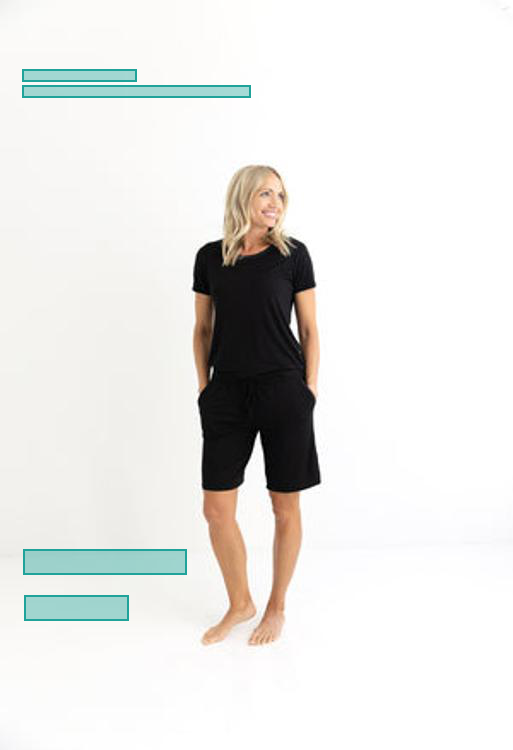

In [11]:
import matplotlib.pyplot as plt
DATASET_COLOR = {
    1: '#929F29',   
    2: '#1FA39A',  
    3: '#987FF2',      
    4: '#F56881',    
    5: "#0000FF"      
}
def sort_key(x):
    if x[0] == 3:
        return -1
    else:
        return x[0]
    
with torch.no_grad():
    with torch.autocast(device_type="cuda"):
        samp = model.generate(processed_images, inst,max_new_tokens=512,do_sample=False,temperature=0.6,top_p=0.9)

layout_images = []
for i in range(len(processed_images)):
    bboxes,clses = get_bbox(samp[i])
    drawbbox = []
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        x2 += x1
        y2 += y1
        bbox  = [x1, y1, x2, y2]
        drawbbox.append(np.array(bbox))
    drawn_outline = images[i].copy()
    drawn_fill = images[i].copy()
    draw_ol = ImageDraw.ImageDraw(drawn_outline)
    draw_f = ImageDraw.ImageDraw(drawn_fill)

    sorted_pairs = sorted(zip(clses, drawbbox), key=sort_key)
    sorted_classes, sorted_bboxes = zip(*sorted_pairs)

    clses = list(sorted_classes)
    drawbbox = list(sorted_bboxes)

    for b,l in zip(drawbbox,clses):
        draw_ol.rectangle([b[0],b[1],b[2],b[3]], outline=DATASET_COLOR[l], width=2)
    for b,l in zip(drawbbox,clses):
        draw_f.rectangle([b[0],b[1],b[2],b[3]], fill=DATASET_COLOR[l])
    drawn_outline = drawn_outline.convert("RGBA")
    drawn_fill = drawn_fill.convert("RGBA")

    drawn_fill.putalpha(int(256 * 0.4))
    img = Image.alpha_composite(drawn_outline, drawn_fill)
    layout_images.append(img)

display(layout_images[0])
#display(layout_images[1])
#display(layout_images[2])
#display(layout_images[3])
#display(layout_images[4])

In [7]:
import matplotlib.pyplot as plt
DATASET_COLOR = {
    1: '#929F29',   
    2: '#1FA39A',  
    3: '#987FF2',      
    4: '#F56881',    
    5: "#0000FF"      
}
def sort_key(x):
    if x[0] == 3:
        return -1
    else:
        return x[0]
    
with torch.no_grad():
    with torch.autocast(device_type="cuda"):
        samp = model.generate(processed_images, inst,max_new_tokens=512,do_sample=False,temperature=0.6,top_p=0.9)

layout_images = []
for i in range(len(img_paths)):
    bboxes,clses = get_bbox(samp[i])
    drawbbox = []
    for bbox in bboxes:
        x1, y1, x2, y2 = bbox
        x2 += x1
        y2 += y1
        bbox  = [x1, y1, x2, y2]
        drawbbox.append(np.array(bbox))
    drawn_outline = images[i].copy()
    drawn_fill = images[i].copy()
    draw_ol = ImageDraw.ImageDraw(drawn_outline)
    draw_f = ImageDraw.ImageDraw(drawn_fill)

    sorted_pairs = sorted(zip(clses, drawbbox), key=sort_key)
    sorted_classes, sorted_bboxes = zip(*sorted_pairs)

    clses = list(sorted_classes)
    drawbbox = list(sorted_bboxes)

    for b,l in zip(drawbbox,clses):
        draw_ol.rectangle([b[0],b[1],b[2],b[3]], outline=DATASET_COLOR[l], width=2)
    for b,l in zip(drawbbox,clses):
        draw_f.rectangle([b[0],b[1],b[2],b[3]], fill=DATASET_COLOR[l])
    drawn_outline = drawn_outline.convert("RGBA")
    drawn_fill = drawn_fill.convert("RGBA")

    drawn_fill.putalpha(int(256 * 0.4))
    img = Image.alpha_composite(drawn_outline, drawn_fill)
    layout_images.append(img)

display(layout_images[0])
display(layout_images[1])
display(layout_images[2])
display(layout_images[3])
display(layout_images[4])

0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100


In [9]:
import torch
from transformers import AutoTokenizer, RobertaForMaskedLM
torch.load("/data1/poong/tjfwownd/PosterNUWA/data/cgl_dataset/radm_dataset/RADM_dataset/text_features/test/100000002065_16_mask002_feats.pth")['feats'][0]
tokenizer = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [31]:
token = torch.load("/data1/poong/tjfwownd/PosterNUWA/data/cgl_dataset/radm_dataset/RADM_dataset/text_features/test/100021072132_6_mask002_feats.pth")['feats']
for to in token:
    predicted_token_id=to.argmax(axis=-1)
    print(tokenizer.decode(predicted_token_id))


 came
le
 believe
 came


In [29]:
len(token)

2